In [39]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import pytz
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [2]:
Data_X = pd.read_csv('UberPriceTrackX.csv')
Data_Pool = pd.read_csv('UberPriceTrackPool.csv')
Data_X.head()

,Time,None,Price,Duration,Distance,Wait_Time
0,2018-11-08 17:51:51.493805,1541699632,8.71,960,3.27,4
1,2018-11-08 17:55:56.128564,1541699877,8.71,960,3.27,3
2,2018-11-08 17:56:57.918118,1541699939,8.71,960,3.27,2
3,2018-11-08 17:57:59.659881,1541700001,8.71,960,3.27,2
4,2018-11-08 17:59:01.625413,1541700063,8.71,960,3.27,4


In [34]:
def time_converter(Data):
    date = list(Data['Time'])

    converted_date = []
    
    for date in date:
        converted_date.append(convert_time(date))

    Data['Converted Time'] = converted_date
    Data_df = Data[['Time','Converted Time','Price','Duration','Distance','Wait_Time']]
    
    return Data_df

def convert_time(dt):
    date_format='%Y-%m-%d %H:%M:%S.%f'

    date_current_utc = datetime.strptime(dt, date_format)
    date_current_utc = pytz.utc.localize(date_current_utc).astimezone(pytz.UTC)
    
    date_changed = date_current_utc.astimezone(timezone('US/Pacific'))
    
    return date_changed

In [30]:
Data_X = time_converter(Data_X)
Data_Pool = time_converter(Data_Pool)

In [31]:
Data_Pool.head()

,Time,Converted Time,Price,Duration,Distance,Wait_Time
0,2018-11-08 17:51:51.493805,2018-11-08 09:51:51.493805-08:00,9.69,960,3.27,4
1,2018-11-08 17:55:56.128564,2018-11-08 09:55:56.128564-08:00,9.69,960,3.27,3
2,2018-11-08 17:56:57.918118,2018-11-08 09:56:57.918118-08:00,9.69,960,3.27,2
3,2018-11-08 17:57:59.659881,2018-11-08 09:57:59.659881-08:00,9.69,960,3.27,2
4,2018-11-08 17:59:01.625413,2018-11-08 09:59:01.625413-08:00,9.69,960,3.27,4


Text(0,0.5,'Trip Price ($)')

<Figure size 432x288 with 0 Axes>

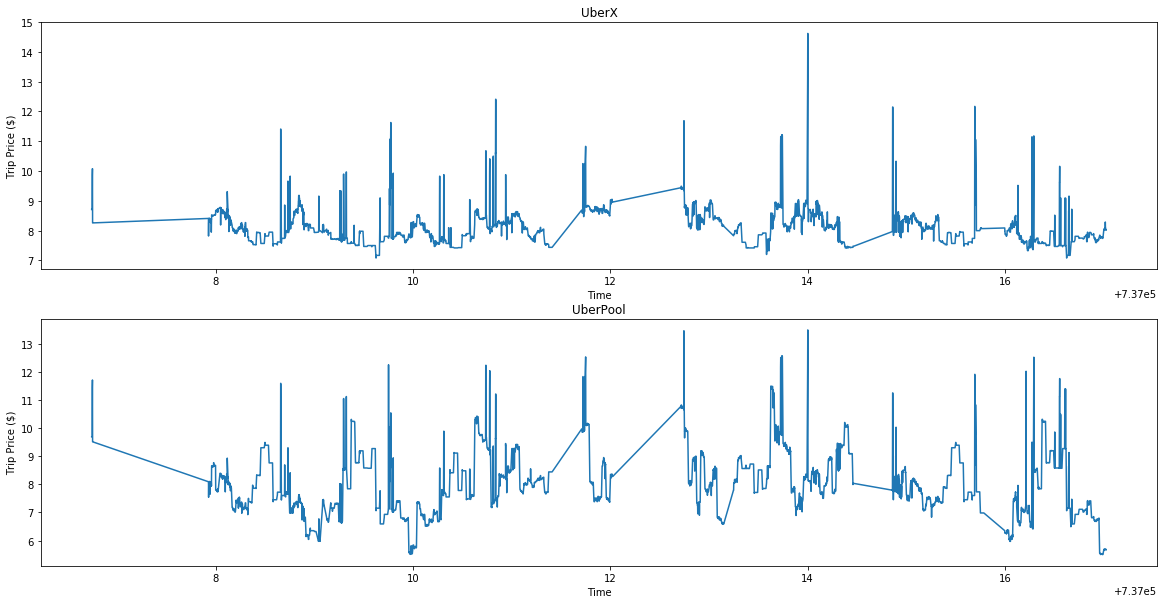

In [49]:
plt.subplots_adjust(hspace = 2)

f = plt.figure(figsize=(20,10))

ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

dates = matplotlib.dates.date2num(Data_X['Converted Time'].tolist())
ax.plot(dates, Data_X['Price'])
ax.set_title("UberX")
ax.set_xlabel('Time')
ax.set_ylabel('Trip Price ($)')

dates = matplotlib.dates.date2num(Data_Pool['Converted Time'].tolist())
ax2.plot(dates, Data_Pool['Price'])
ax2.set_title("UberPool")
ax2.set_xlabel('Time')
ax2.set_ylabel('Trip Price ($)')

In [50]:
### NOTE CHANGE PLOT TO PLOTLY